In [ ]:
!pip install opencv-python



In [ ]:
import cv2
print("OpenCV version:", cv2.__version__)


OpenCV version: 4.10.0


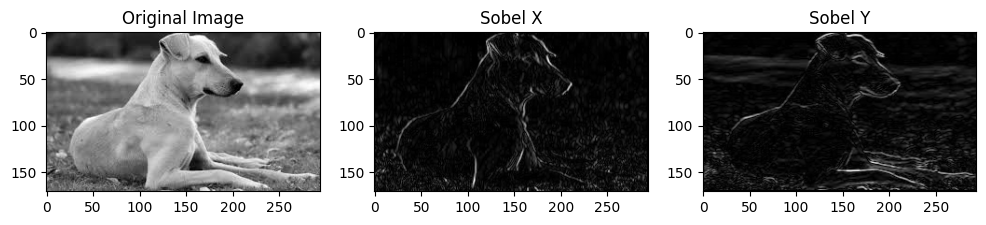

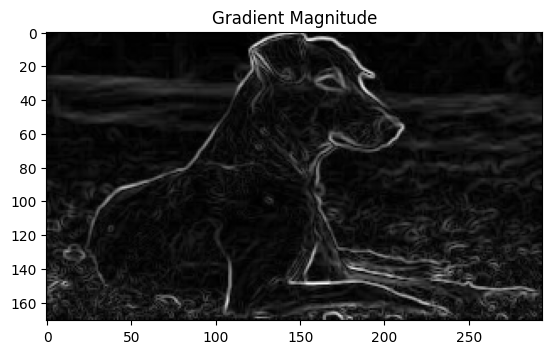

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

magnitude = cv2.magnitude(sobel_x, sobel_y)
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(np.abs(sobel_x), cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 3), plt.imshow(np.abs(sobel_y), cmap='gray'), plt.title('Sobel Y')
plt.show()

plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.show()


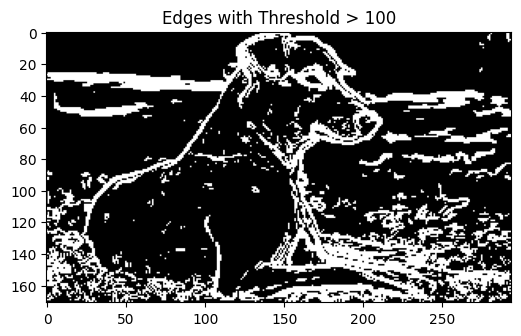

In [ ]:

threshold = 100
_, thresholded_edges = cv2.threshold(magnitude, threshold, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 6))
plt.imshow(thresholded_edges, cmap='gray')
plt.title(f'Edges with Threshold > {threshold}')
plt.show()


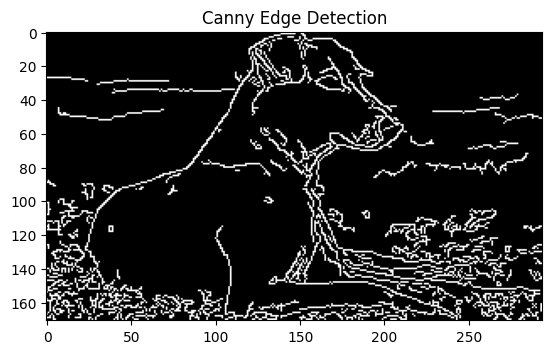

In [ ]:

edges_canny = cv2.Canny(image, 100, 200)
plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


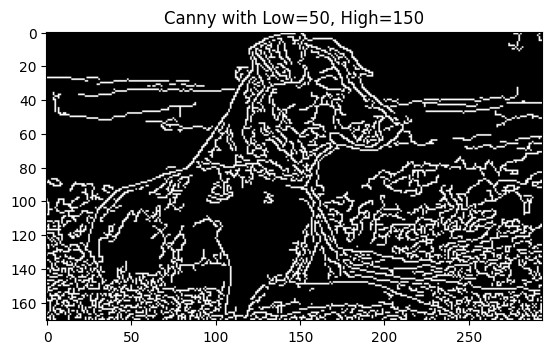

In [ ]:

low_threshold = 50
high_threshold = 150
edges_canny_experiment = cv2.Canny(image, low_threshold, high_threshold)
plt.imshow(edges_canny_experiment, cmap='gray')
plt.title(f'Canny with Low={low_threshold}, High={high_threshold}')
plt.show()


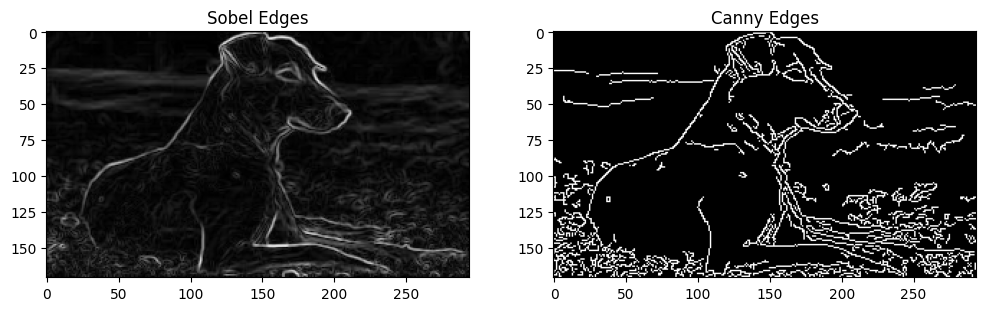

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(magnitude, cmap='gray'), plt.title('Sobel Edges')
plt.subplot(1, 2, 2), plt.imshow(edges_canny, cmap='gray'), plt.title('Canny Edges')
plt.show()


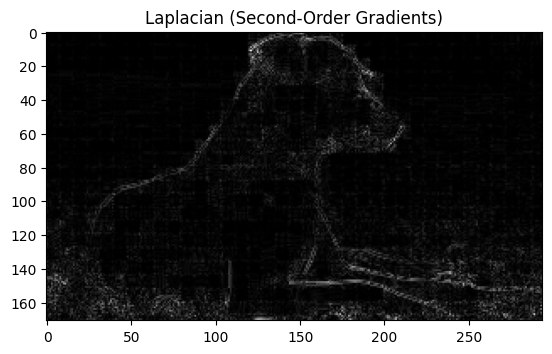

In [ ]:

laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.imshow(np.abs(laplacian), cmap='gray')
plt.title('Laplacian (Second-Order Gradients)')
plt.show()


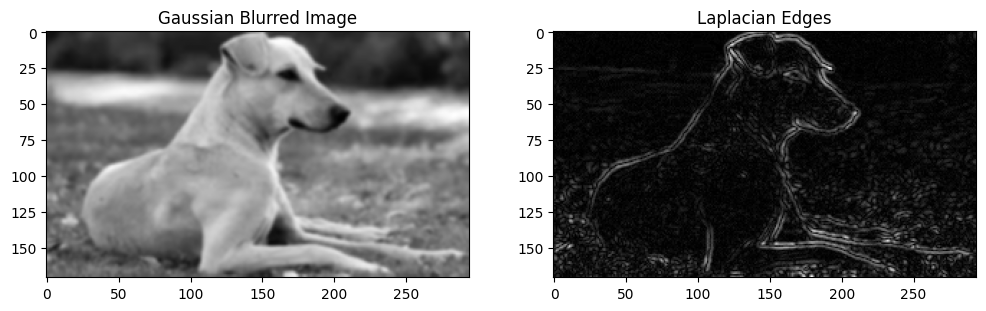

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('dog.jpg', cv2.IMREAD_GRAYSCALE)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
laplacian_edges = cv2.Laplacian(blurred_image, cv2.CV_64F)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(blurred_image, cmap='gray'), plt.title('Gaussian Blurred Image')
plt.subplot(1, 2, 2), plt.imshow(np.abs(laplacian_edges), cmap='gray'), plt.title('Laplacian Edges')
plt.show()


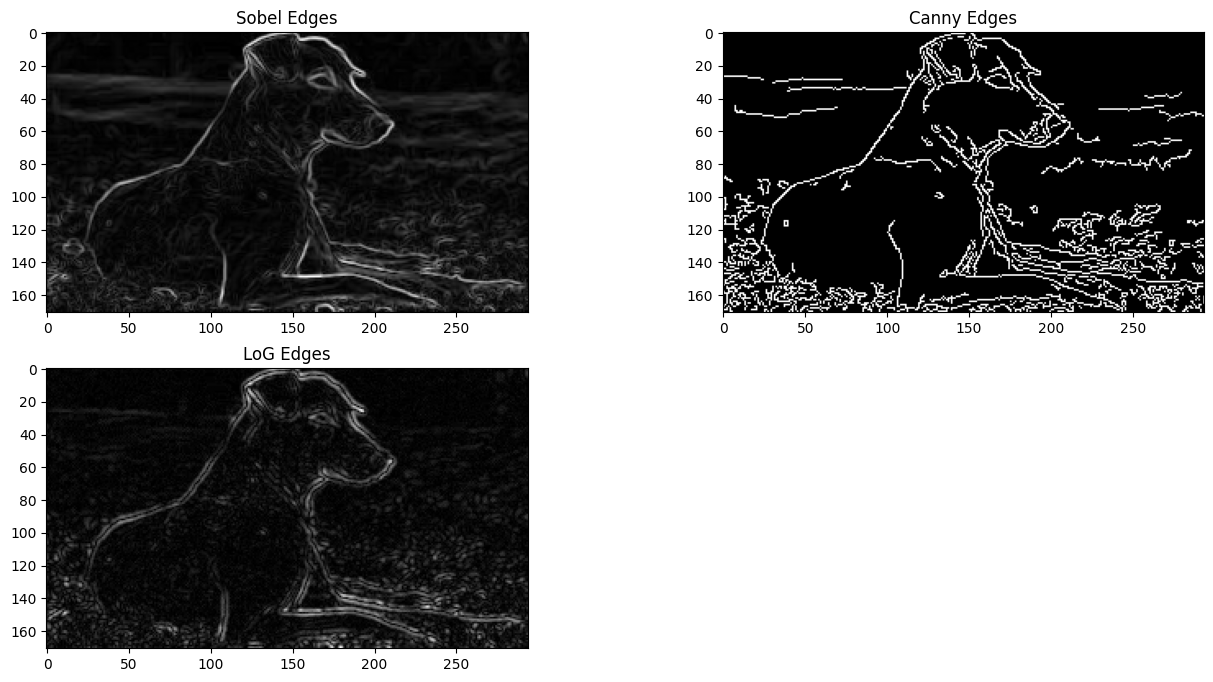

In [ ]:

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
canny_edges = cv2.Canny(image, 100, 200)
log_image = cv2.GaussianBlur(image, (5, 5), 0)
log_edges = cv2.Laplacian(log_image, cv2.CV_64F)

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel Edges')
plt.subplot(2, 2, 2), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(2, 2, 3), plt.imshow(np.abs(log_edges), cmap='gray'), plt.title('LoG Edges')
plt.show()


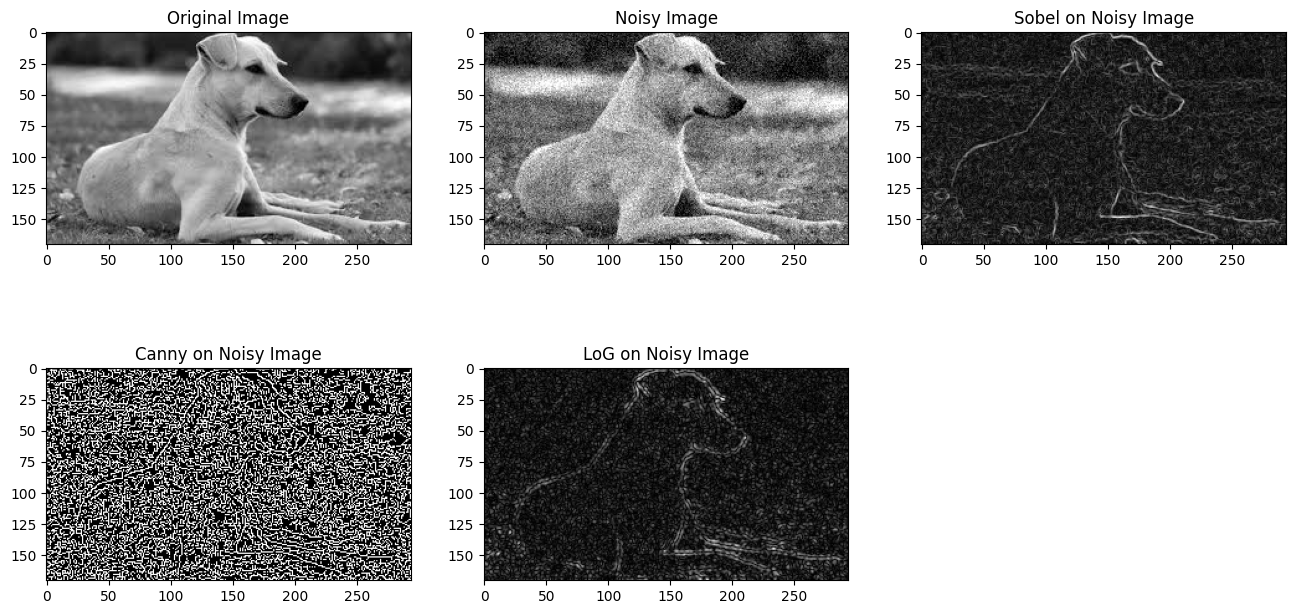

In [ ]:

noise = np.random.normal(0, 25, image.shape).astype(np.float32)
noisy_image = cv2.add(image.astype(np.float32), noise)
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

sobel_x_noisy = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_noisy = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined_noisy = cv2.magnitude(sobel_x_noisy, sobel_y_noisy)

canny_noisy = cv2.Canny(noisy_image, 100, 200)

log_noisy = cv2.GaussianBlur(noisy_image, (5, 5), 0)
log_edges_noisy = cv2.Laplacian(log_noisy, cv2.CV_64F)

plt.figure(figsize=(16, 8))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(noisy_image, cmap='gray'), plt.title('Noisy Image')
plt.subplot(2, 3, 3), plt.imshow(sobel_combined_noisy, cmap='gray'), plt.title('Sobel on Noisy Image')
plt.subplot(2, 3, 4), plt.imshow(canny_noisy, cmap='gray'), plt.title('Canny on Noisy Image')
plt.subplot(2, 3, 5), plt.imshow(np.abs(log_edges_noisy), cmap='gray'), plt.title('LoG on Noisy Image')
plt.show()
